In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from src.simulate_trace import MakeTrace, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse, RandomPhase

In [2]:
# idea: implementation of true doubleblind algorithm -> merge two traces along m 
#   -> problem: nonlinear_method depends on m then (can be handled)
#   -> but what about different scales of traces -> there may be a different background -> sharp edges along m
#       -> might be an issue. But maybe its irrelevant since its along m and not n.

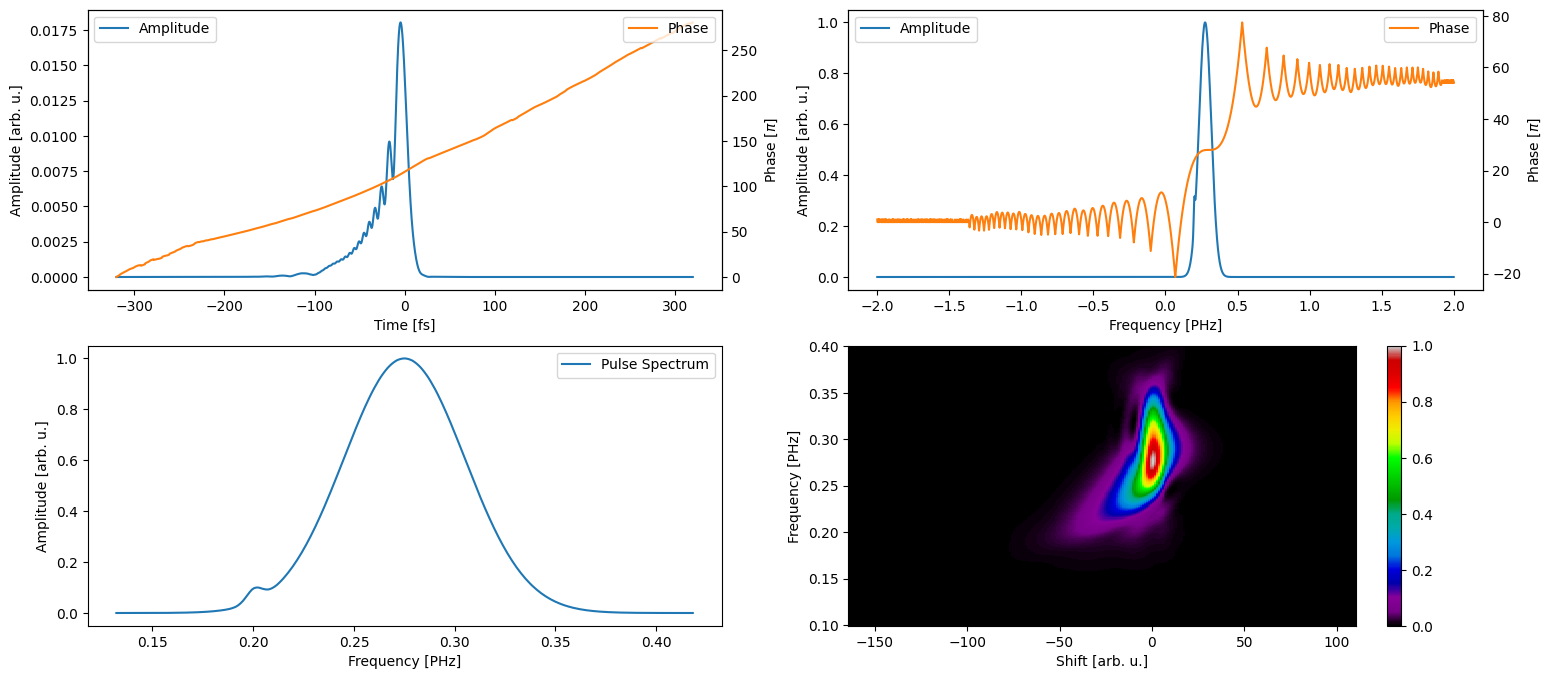

In [3]:

pulse_maker = MakeTrace(N=128*20, Delta_f=2)

central_f = 0.275
phase = PolynomialPhase(0.3, (0,0,0,50))
amp = GaussianAmplitude((1,0.1), (0.275,0.2), (0.1,0.01))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))


input_pulses = pulse_maker.pulses



central_f = 0.4
phase = PolynomialPhase(central_frequency = central_f, coefficients = np.array([0, 0, -250]))
amp = GaussianAmplitude(central_frequency = central_f, amplitude = 1.0, fwhm = 0.05)
_, _, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))


delay, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "pg", cross_correlation=False, interferometric=False,
                                                          gate=(frequency_gate, pulse_f_gate), real_fields=False, interpolate_fft_conform=False,
                                                          N=128*2, scale_time_range=1.5, plot_stuff=True, cut_off_val=0.0001, frequency_range=(0.1,0.4))

In [4]:
from src.real_fields.frog.classical_algorithms_frog_real_fields import COPRA#PtychographicIterativeEngine
#from src.real_fields.frog.general_algorithms_frog_real_fields import AutoDiff, DifferentialEvolution

import optax

from src.frog import PtychographicIterativeEngine
#from src.core.construct_s_prime import calculate_S_prime_projection

In [26]:
de = COPRA(delay, frequency, trace, "pg", cross_correlation=False, f_range_fields=(0.1,0.4))

population = de.create_initial_population(3, "random")


de.local_adaptive_scaling = False
de.global_adaptive_scaling = False
#de.solver = optax.adam(learning_rate=1e-1)

de.local_gamma = 1e-2
de.global_gamma = 1e-2

# de.solver = optax.adam(learning_rate=0.1)

final_result = de.run(population, 50, 150)

(Array(9.0407975e-06, dtype=float32), Array(2.4949782e-07, dtype=float32))
(Array(1.7608658e-05, dtype=float32), Array(5.318627e-07, dtype=float32))
(Array(2.2027875e-06, dtype=float32), Array(7.281053e-08, dtype=float32))
(Array(3.8754574e-06, dtype=float32), Array(1.1388576e-07, dtype=float32))
(Array(2.2563254e-05, dtype=float32), Array(8.0089336e-07, dtype=float32))
(Array(0.00037379, dtype=float32), Array(8.775853e-06, dtype=float32))
(Array(0.00069869, dtype=float32), Array(2.7715001e-05, dtype=float32))
(Array(0.00038207, dtype=float32), Array(1.5855256e-05, dtype=float32))
(Array(0.00026801, dtype=float32), Array(7.5235985e-06, dtype=float32))
(Array(0.00069628, dtype=float32), Array(3.4413937e-05, dtype=float32))
(Array(4.26204e-06, dtype=float32), Array(1.5044526e-07, dtype=float32))
(Array(0.00042409, dtype=float32), Array(1.1019379e-05, dtype=float32))
(Array(9.563245e-05, dtype=float32), Array(7.3829156e-06, dtype=float32))
(Array(2.7243063e-06, dtype=float32), Array(9.845

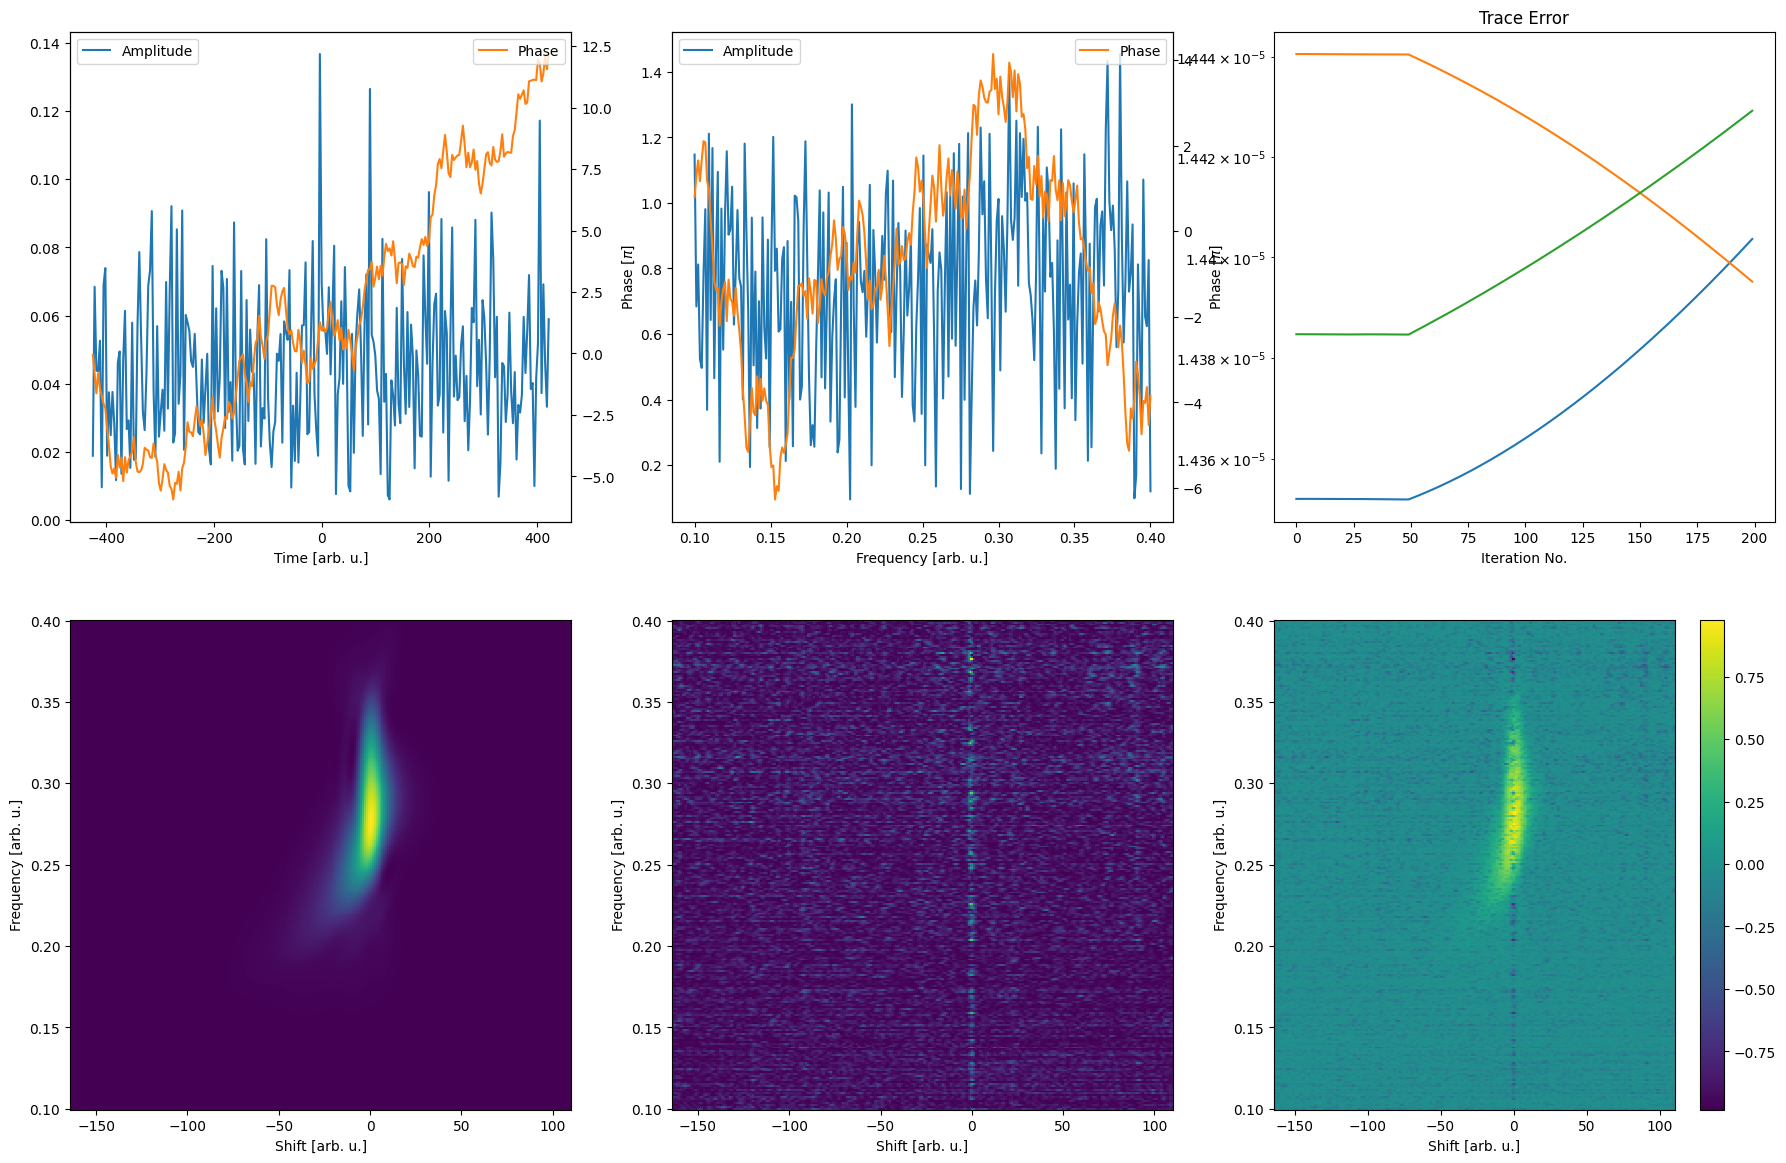

In [27]:
de.plot_results(final_result)

In [7]:
final_result.error_arr

Array([[1.48120689e-05, 1.48561803e-05, 1.47642368e-05],
       [1.45886643e-05, 1.47872815e-05, 1.47321607e-05],
       [1.43346133e-05, 1.48072086e-05, 1.47015617e-05],
       [1.42162789e-05, 1.48368472e-05, 1.46797784e-05],
       [1.41334767e-05, 1.48603267e-05, 1.46663542e-05],
       [1.40934608e-05, 1.48791169e-05, 1.46624734e-05],
       [1.40743632e-05, 1.48939926e-05, 1.46632465e-05],
       [1.40751490e-05, 1.49058096e-05, 1.46669026e-05],
       [1.40872735e-05, 1.49142807e-05, 1.46722559e-05],
       [1.41059409e-05, 1.49203661e-05, 1.46791199e-05],
       [1.41288374e-05, 1.49241550e-05, 1.46868515e-05],
       [1.41555120e-05, 1.49260877e-05, 1.46953780e-05],
       [1.41823803e-05, 1.49267862e-05, 1.47043520e-05],
       [1.42111176e-05, 1.49263933e-05, 1.47141909e-05],
       [1.42394701e-05, 1.49249163e-05, 1.47242963e-05],
       [1.42676054e-05, 1.49229309e-05, 1.47351002e-05],
       [1.42953468e-05, 1.49203206e-05, 1.47461033e-05],
       [1.43223506e-05, 1.49174

In [8]:
de.descent_info

MyNamespace(measured_spectrum_is_provided: MyNamespace(pulse: [False, bool], gate: [False, bool]), population_size: [3, int], gamma: MyNamespace(_local: [0.1, float], _global: [0.1, float]), xi: [1e-12, float], linesearch_params: MyNamespace(linesearch: [False, bool], c1: [0.0001, float], c2: [0.9, float], max_steps: [15, int], delta_gamma: [0.5, float]), newton: MyNamespace(_local: [False, bool], _global: [False, bool], linalg_solver: [lineax, str], lambda_lm: [0.001, float], lbfgs_memory: [10, int]), s_prime_params: MyNamespace(_local: [projection, str], _global: [iteration, str], number_of_iterations: [1, int], r_gradient: [intensity, str], r_newton: [False, bool], weights: [1.0, float]), adaptive_scaling: MyNamespace(_local: [linear, str], _global: [linear, str]), conjugate_gradients: [False, bool])

In [9]:
from src.core.construct_s_prime import calculate_S_prime_projection

In [10]:
signal_t = de.generate_signal_t(de.descent_state, de.measurement_info, de.descent_info)
signal_t_new = calculate_S_prime_projection(signal_t.signal_f, de.measurement_info.measured_trace, 1, de.measurement_info)
transform_arr = jnp.broadcast_to(de.measurement_info.transform_arr, (3,128))
measured_trace = jnp.broadcast_to(de.measurement_info.measured_trace, (3,128,128))

TypeError: calculate_S_prime_projection() missing 1 required positional argument: 'rn'

In [ ]:
grad, U = de.calculate_PIE_descent_direction(population, signal_t, signal_t_new, transform_arr, measured_trace, , de.measurement_info, de.descent_info, "pulse")

SyntaxError: invalid syntax (3464244470.py, line 1)

In [ ]:
grad.shape, U.shape

((3, 1, 128), (3, 128, 128))

In [ ]:
d = jnp.sum(grad*U, axis=1)

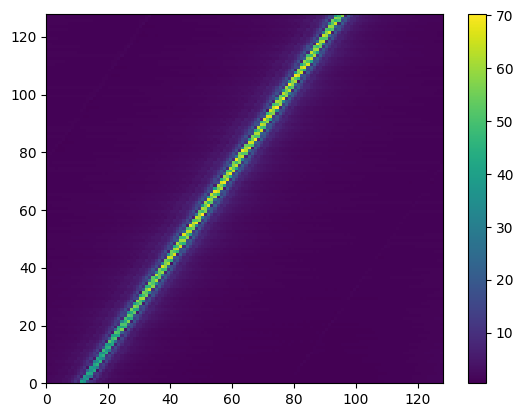

In [ ]:
plt.pcolormesh(jnp.abs(U[0]))
plt.colorbar()

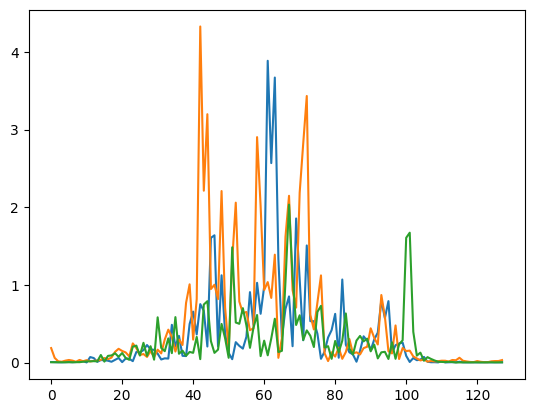

In [ ]:
plt.plot(jnp.abs(d.T))

ValueError: not enough values to unpack (expected 2, got 1)

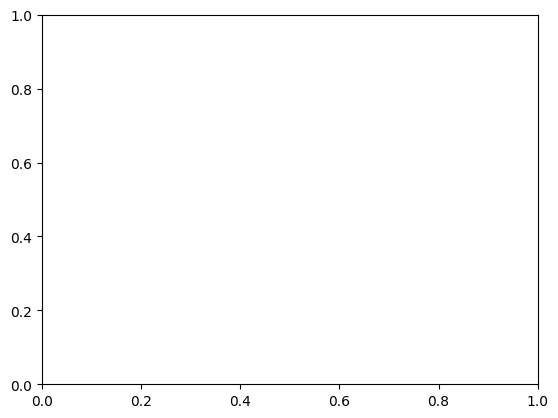

In [ ]:
plt.pcolormesh(jnp.abs(d[2]))

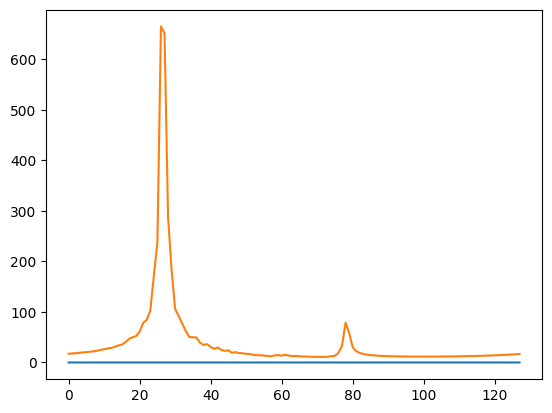

In [ ]:
plt.plot(jnp.abs(res[0][0,0]))
plt.plot(jnp.abs(res[1][0,0]))